In [30]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

Date  ftse_250_price  ftse_250_total_return  base_rate  CPI  \
0    01-12-89     2661.760010             803.789978  14.713333  NaN   
1    01-01-90     2591.129883             783.250000  14.630000  5.7   
2    01-02-90     2463.879883             746.010010  14.546667  5.9   
3    01-03-90     2437.370117             741.700012  14.463333  6.0   
4    01-04-90     2285.780029             701.510010  14.380000  6.4   
..        ...             ...                    ...        ...  ...   
424  01-12-24    20622.605250           18346.656780   4.666667  2.5   
425  01-01-25    20950.482850           18672.852080   4.583333  3.0   
426  01-02-25    20326.383590           18140.063380   4.500000  2.8   
427  01-03-25    19475.479520           17424.441290   4.500000  2.6   
428  01-04-25    19884.587720           17897.238770   4.500000  2.6   

     ftse_350_Price  ftse_350_Total Return (Gross, Unhedged)  price_02_Price  \
0               NaN                                      NaN             NaN   
1       1165.829956                               725.320007             NaN   
2       1121.469971                               700.580017             NaN   
3       1115.699951                               701.400024             NaN   
4       1044.619995                               660.010010             NaN   
..              ...                                      ...             ...   
424     4510.612374                              9911.349295       97.599004   
425     4760.296255                             10468.532720       97.964750   
426     4808.022992                             10614.288820       97.931114   
427     4675.031137                             10374.199300       98.206564   
428     4644.106267                             10346.175470       98.691235   

     price_02_Total Return (Gross, Unhedged)  confidence_score  \
0                                        NaN               NaN   
1                                        NaN             -19.0   
2                                        NaN             -24.0   
3                                        NaN             -35.0   
4                                        NaN             -31.0   
..                                       ...               ...   
424                                  202.318             -17.0   
425                                  203.450             -22.0   
426                                  204.230             -20.0   
427                                  204.810             -19.0   
428                                  206.139             -23.0   

     price_05_Price  price_05_Total Return (Gross, Unhedged)  price_10_Price  \
0               NaN                                      NaN             NaN   
1               NaN                                      NaN             NaN   
2               NaN                                      NaN             NaN   
3               NaN                                      NaN             NaN   
4               NaN                                      NaN             NaN   
..              ...                                      ...             ...   
424       76.436604                                  258.074       70.333738   
425       77.157249                                  260.303       70.983754   
426       77.946072                                  262.794       71.900830   
427       76.341361                                  258.271       69.708409   
428       77.899108                                  263.519       71.042948   

     price_10_Total Return (Gross, Unhedged)  unemployment_rate  \
0                                        NaN                NaN   
1                                        NaN                6.9   
2                                        NaN                6.9   
3                                        NaN                6.9   
4                                        NaN                6.9   
..                         

In [34]:
df_uk_full.describe()

ftse_250_price  ftse_250_total_return   base_rate         CPI  \
count      429.000000             429.000000  429.000000  428.000000   
mean     10618.089403            7088.524507    3.895254    2.741589   
std       6486.845572            5765.988797    3.433704    2.147064   
min       1974.040039             618.229981    0.175000   -0.100000   
25%       4811.399902            2127.800049    0.426966    1.500000   
50%       9306.890000            5232.980000    4.500000    2.200000   
75%      17168.343780           12172.659480    5.730000    3.000000   
max      24102.191970           19395.493530   14.713333   11.100000   

       ftse_350_Price  ftse_350_Total Return (Gross, Unhedged)  \
count      428.000000                               428.000000   
mean      2898.553707                              4074.876157   
std        963.999754                              2551.074231   
min        968.719971                               626.700012   
25%       2181.337488                              2134.199993   
50%       2996.230000                              3465.360000   
75%       3666.856365                              5929.765691   
max       4808.022992                             10614.288820   

       price_02_Price  price_02_Total Return (Gross, Unhedged)  \
count      327.000000                               327.000000   
mean       102.199686                               165.608471   
std          2.019057                                28.512795   
min         96.086395                               100.000000   
25%        101.393485                               141.963000   
50%        102.760895                               181.923000   
75%        103.605045                               186.355000   
max        105.672380                               206.139000   

       confidence_score  price_05_Price  \
count        428.000000      327.000000   
mean         -12.196262      116.558976   
std           12.157390       16.419084   
min          -49.000000       74.537811   
25%          -21.000000      108.945661   
50%          -10.000000      117.472840   
75%           -3.000000      126.876200   
max           10.000000      152.680969   

       price_05_Total Return (Gross, Unhedged)  price_10_Price  \
count                               327.000000      345.000000   
mean                                233.210150      119.766901   
std                                  91.571367       20.393053   
min                                 100.000000       69.708409   
25%                                 149.728500      108.732895   
50%                                 244.103000      119.794840   
75%                                 299.265500      133.330400   
max                                 423.925000      168.403976   

       price_10_Total Return (Gross, Unhedged)  unemployment_rate  \
count                               345.000000         428.000000   
mean                               1072.605623           6.202804   
std                                 495.807034           1.857170   
min                                 343.756000           3.600000   
25%                                 636.799000           4.800000   
50%                                 943.254000           5.500000   
75%                                1412.945000           7.800000   
max                                2192.415000          10.700000   

       wage_growth_rate     gdp_GDP  polarity_score_finbert  
count        293.000000  429.000000              294.000000  
mean           3.380546    0.498368                0.071241  
std            1.960185    2.497648                0.162852  
min           -2.900000  -20.300000               -0.485326  
25%            2.000000    0.300000               -0.000799  
50%            3.200000    0.500000                0.062303  
75%            4.700000    0.800000                0.176186  
max            8.900000   16.800000                0.514315

In [36]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [38]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2008-01-01'
end_date = '2012-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2008_2012 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2008_2012.dtypes


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22232\4037234991.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22232\4242766437.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2008-01-01', end='2012-12-31', freq='M')


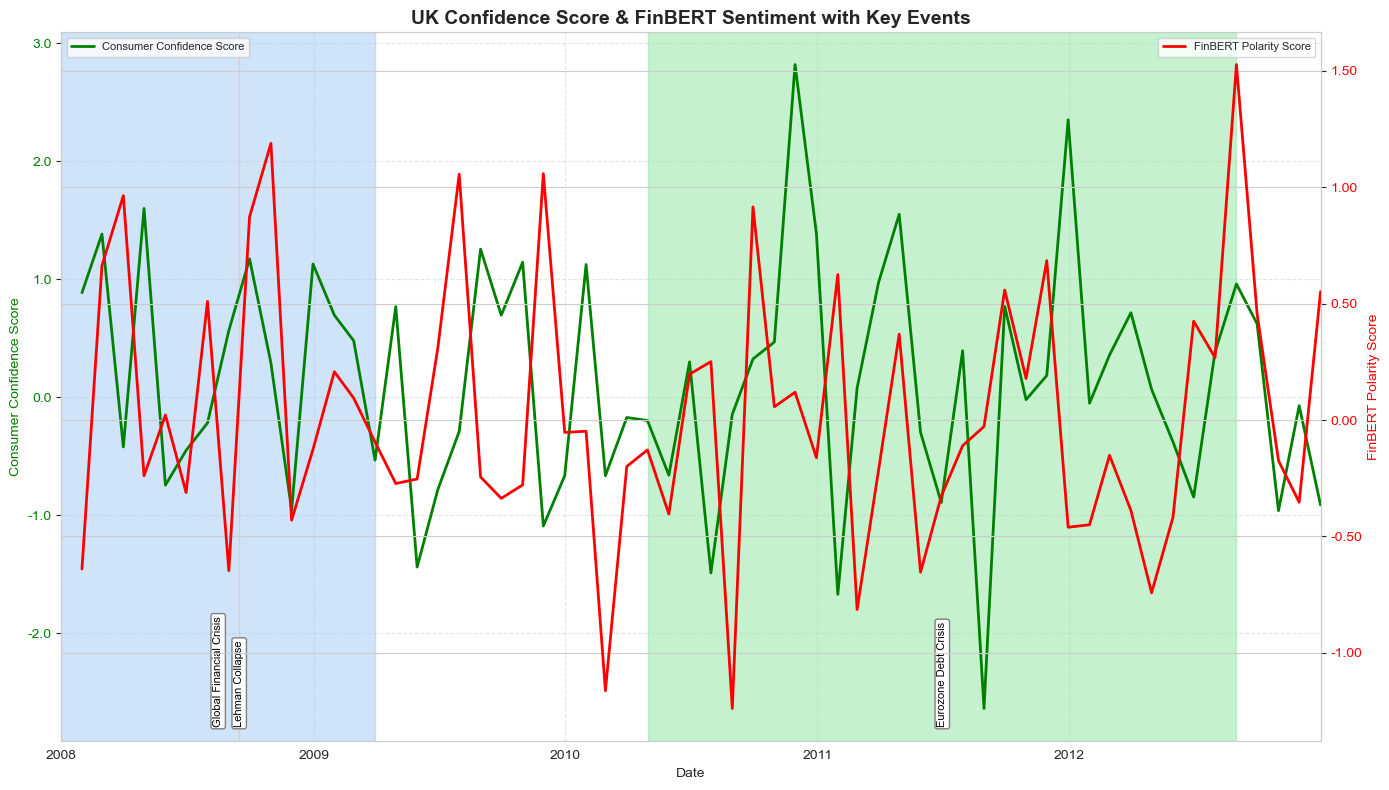

In [40]:
# Generate the date range and dataset
date_range = pd.date_range(start='2008-01-01', end='2012-12-31', freq='M')
df_uk_new = pd.DataFrame({
    'Date': date_range,
    'confidence_score': np.random.normal(loc=0, scale=1, size=len(date_range)),
    'polarity_score_finbert': np.random.normal(loc=0, scale=0.5, size=len(date_range))
})

# Filter for 2008–2012
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_plot = df_uk_new[
    (df_uk_new['Date'] >= start_date) & (df_uk_new['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Key economic events
events = {
    'Global Financial Crisis': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
}

# Plot setup
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot confidence score (green)
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Consumer Confidence Score', color='green', fontsize=10)
ax1.plot(df_plot['Date'], df_plot['confidence_score'], color='green',
         label='Consumer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor='green')

# Plot sentiment score (red)
ax2 = ax1.twinx()
ax2.set_ylabel('FinBERT Polarity Score', color='red', fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color='red',
         label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor='red')

# Event shading and labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
for i, (event_name, dates) in enumerate(events.items()):
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])
    if end < start_date:
        continue
    display_start = max(start, start_date)
    display_end = min(end, end_date)
    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    label_x = display_start + (display_end - display_start) / 2
    ax1.text(label_x, 0.02, event_name, rotation=90, fontsize=8, color='black',
             ha='center', va='bottom', transform=ax1.get_xaxis_transform(),
             bbox=dict(facecolor='white', alpha=1, edgecolor='gray', boxstyle='round,pad=0.2'))

# Title and layout
plt.title('UK Confidence Score & FinBERT Sentiment with Key Events', fontsize=14, fontweight='bold')
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Set axis limits
ax1.set_xlim(start_date, end_date)
ax1.grid(True, linestyle='--', alpha=0.5)

# Add legends
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

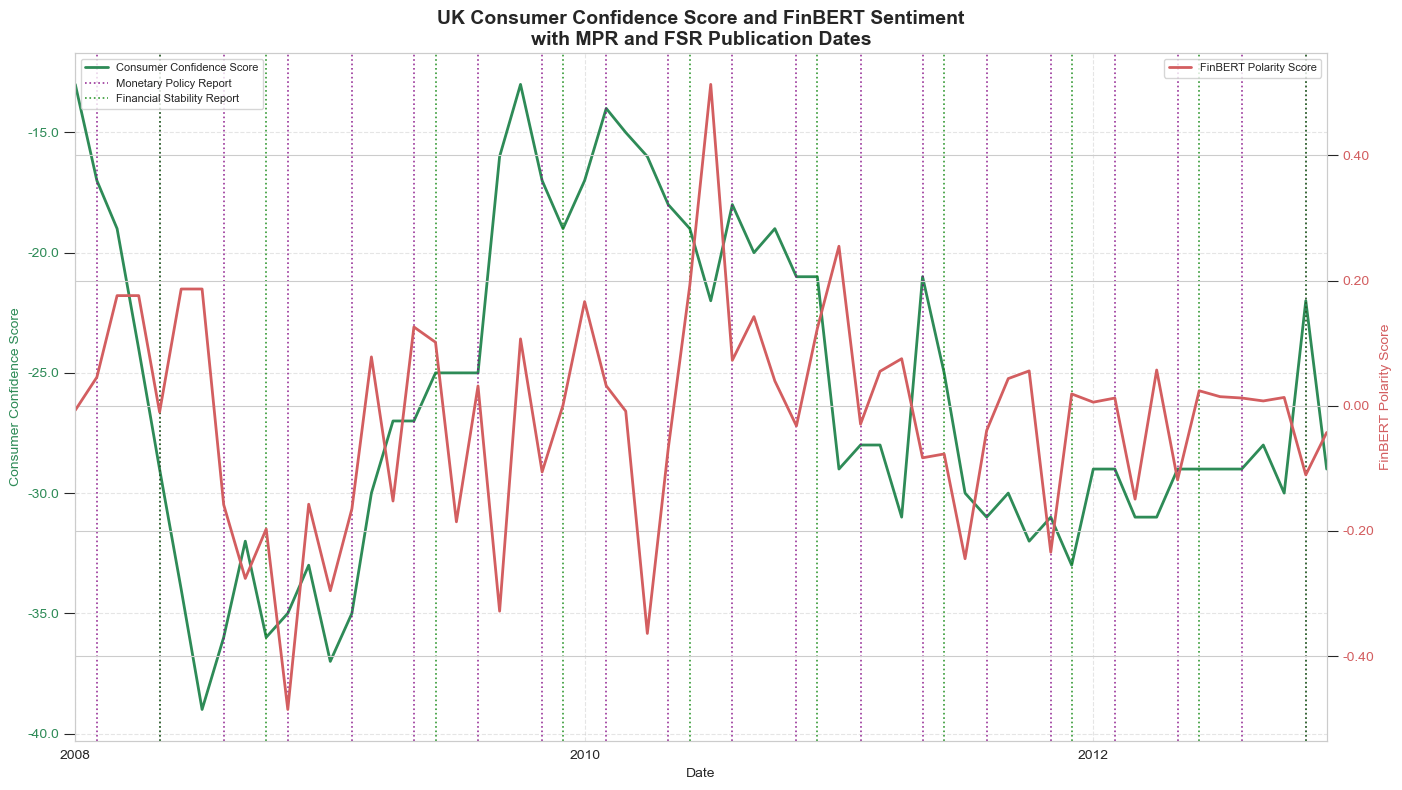

In [42]:
start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Consumer Confidence Score', color=color_conf, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['confidence_score'], color=color_conf, label='Consumer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_conf, size=8)

# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Consumer Confidence Score and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
#ax1.set_ylim(df_plot['confidence_score'].min() - 1, df_plot['confidence_score'].max() + 1)
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

In [43]:
df_uk_2008_2012.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'base_rate', 'CPI',
       'ftse_350_Price', 'ftse_350_Total Return (Gross, Unhedged)',
       'price_02_Price', 'price_02_Total Return (Gross, Unhedged)',
       'confidence_score', 'price_05_Price',
       'price_05_Total Return (Gross, Unhedged)', 'price_10_Price',
       'price_10_Total Return (Gross, Unhedged)', 'unemployment_rate',
       'wage_growth_rate', 'gdp_GDP', 'polarity_score_finbert'],
      dtype='object')

#### Drop unncessary columns to reduce the number of variables to be explored

In [47]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2008_2012.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [49]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [51]:
# Define the new order of the columns
new_column_order = [
    'Date', 'confidence_score', 'finbert_sentiment_score', 'CPI_pct_change',
     'unemployment_rate','wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

Date  confidence_score  finbert_sentiment_score  CPI_pct_change  \
218 2008-01-01             -13.0                -0.007201             2.2   
219 2008-02-01             -17.0                 0.045560             2.5   
220 2008-03-01             -19.0                 0.175849             2.5   
221 2008-04-01             -24.0                 0.175849             3.0   
222 2008-05-01             -29.0                -0.010290             3.3   

     unemployment_rate  wage_growth_rate  GDP_pct_change  \
218                5.2               3.8             0.5   
219                5.2               3.6             0.5   
220                5.3               4.1            -0.5   
221                5.2               4.6            -0.5   
222                5.4               4.7            -0.5   

     ftse_250_total_return  BoE_base_rate  0-2yr_gilts_TReturns  
218                5488.98       5.375000               162.975  
219                5594.87       5.250000               163.862  
220                5581.66       5.125000               164.798  
221                5679.93       5.000000               164.468  
222                5657.73       4.916667               164.014

### Corraletion Analysis

#### Create pairplot for visual correlation analysis

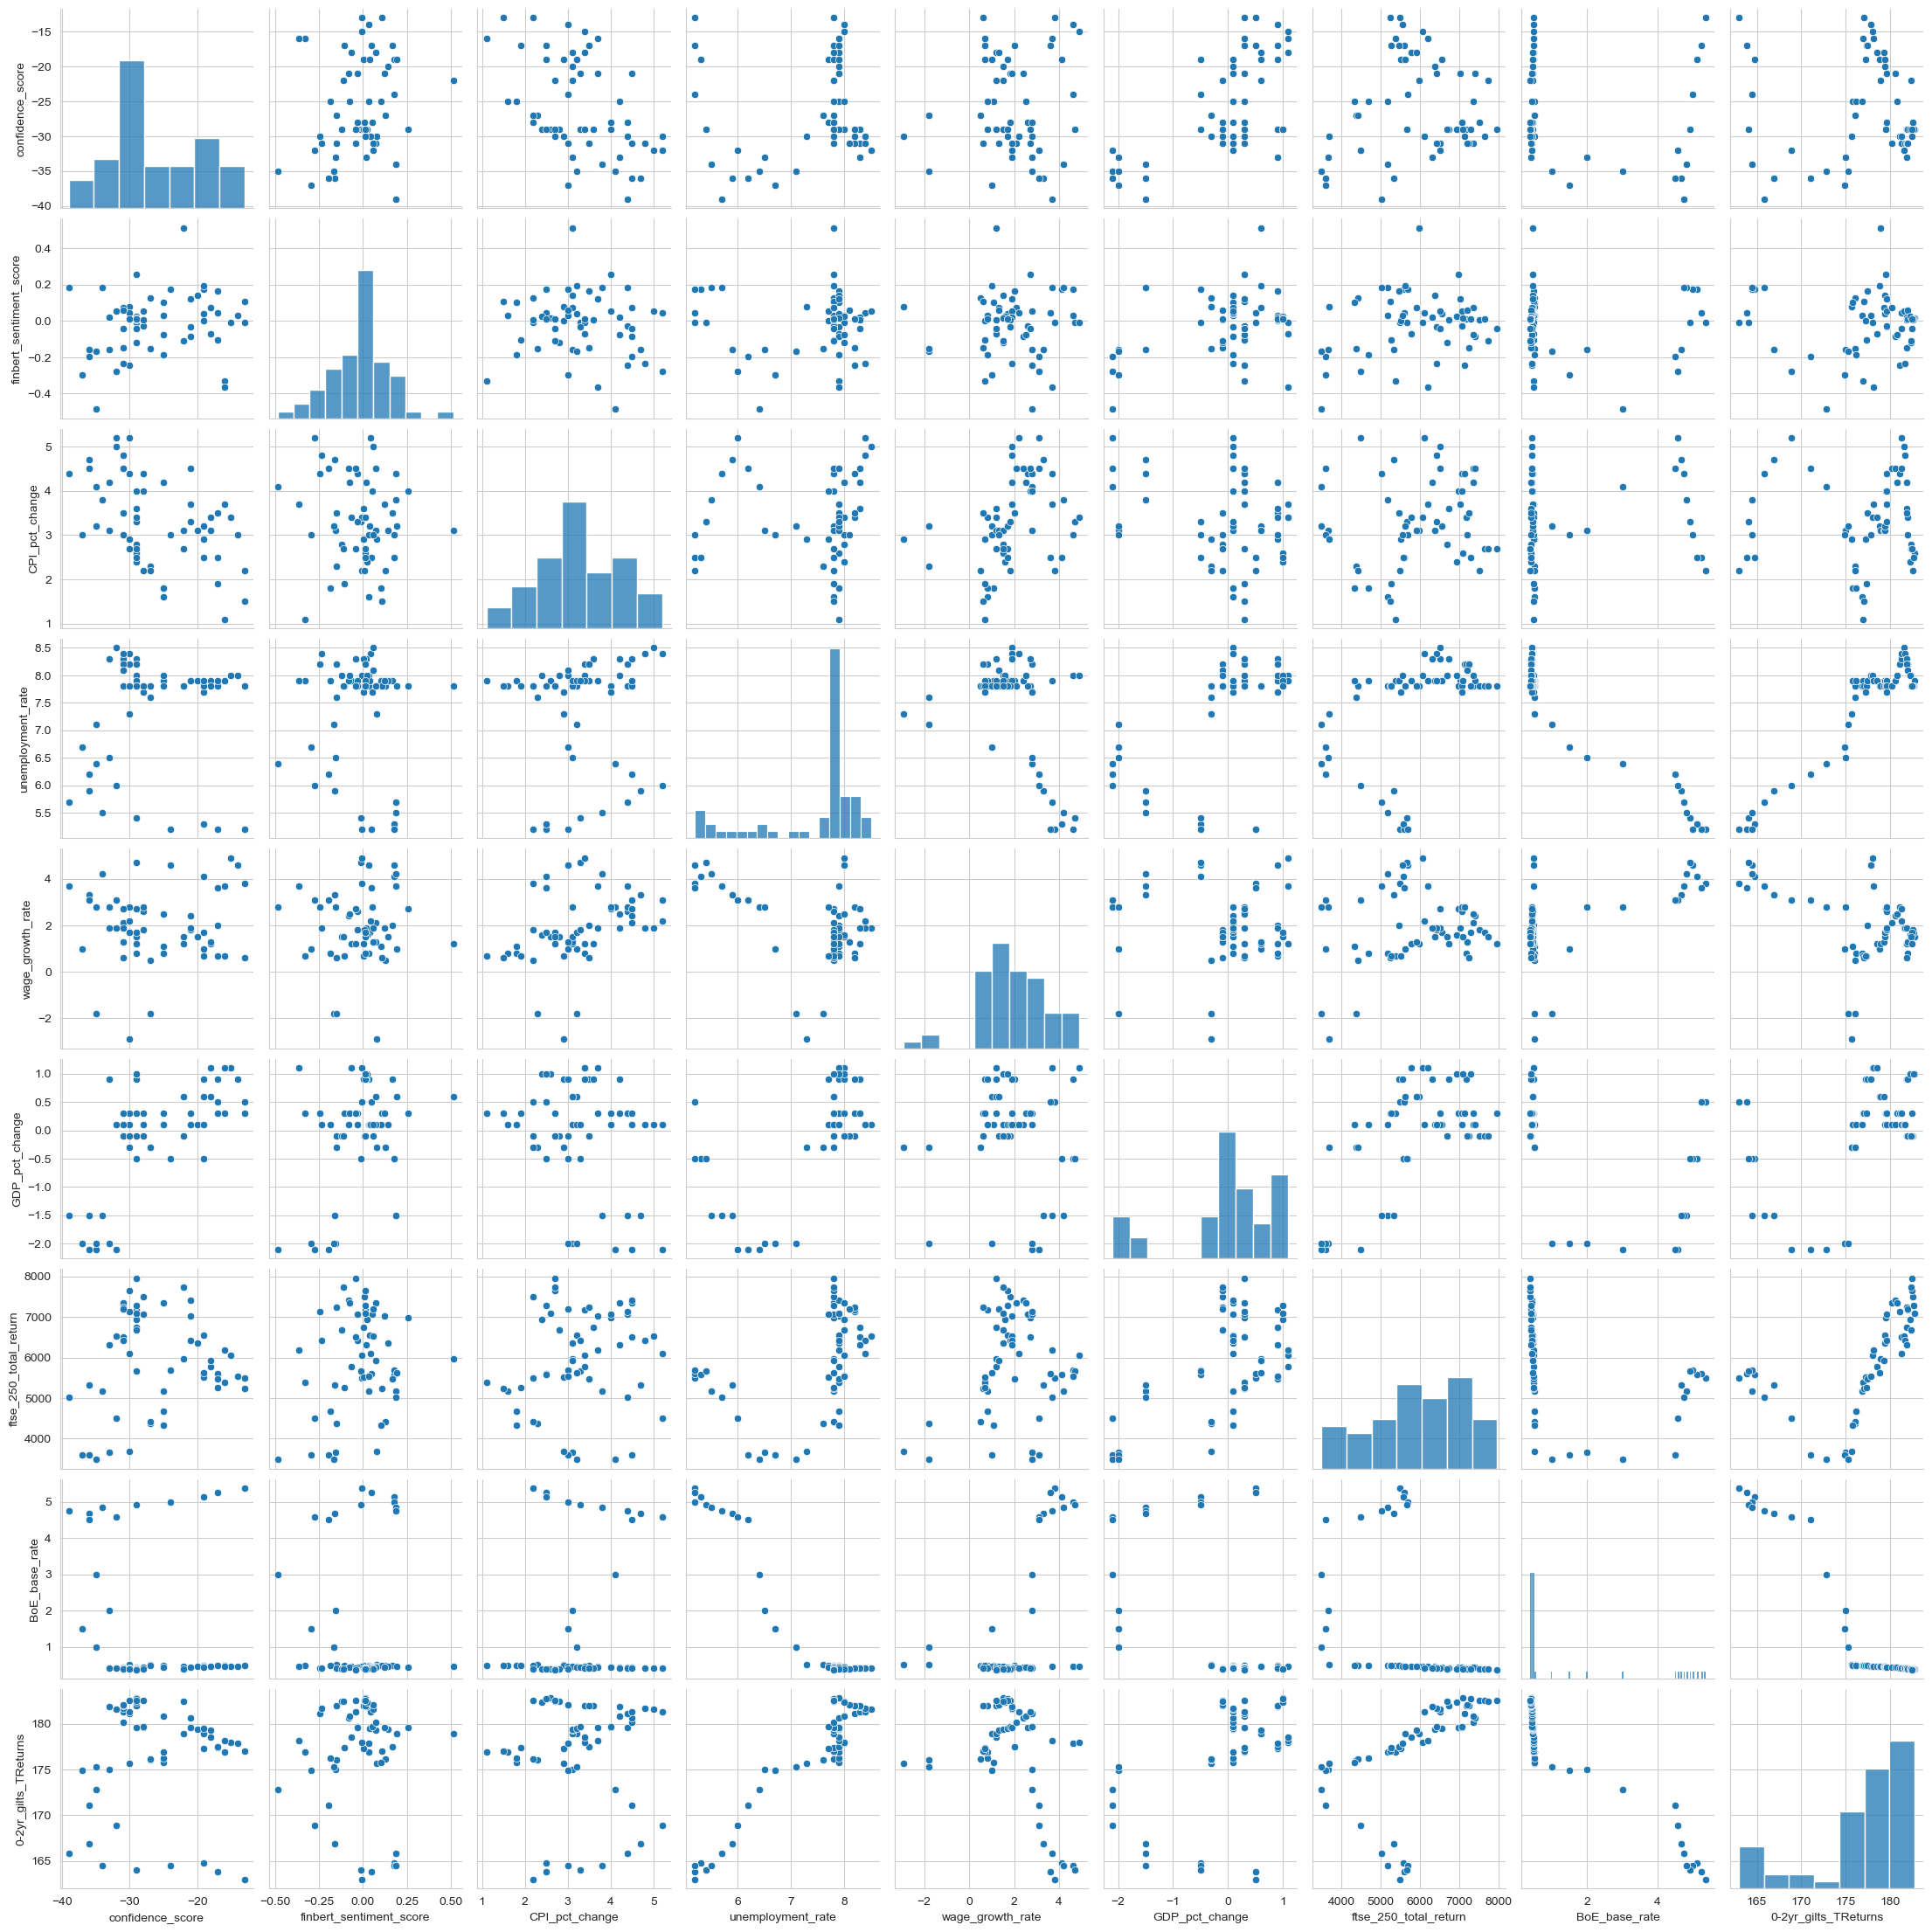

In [15]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

#### Create correlation matrices


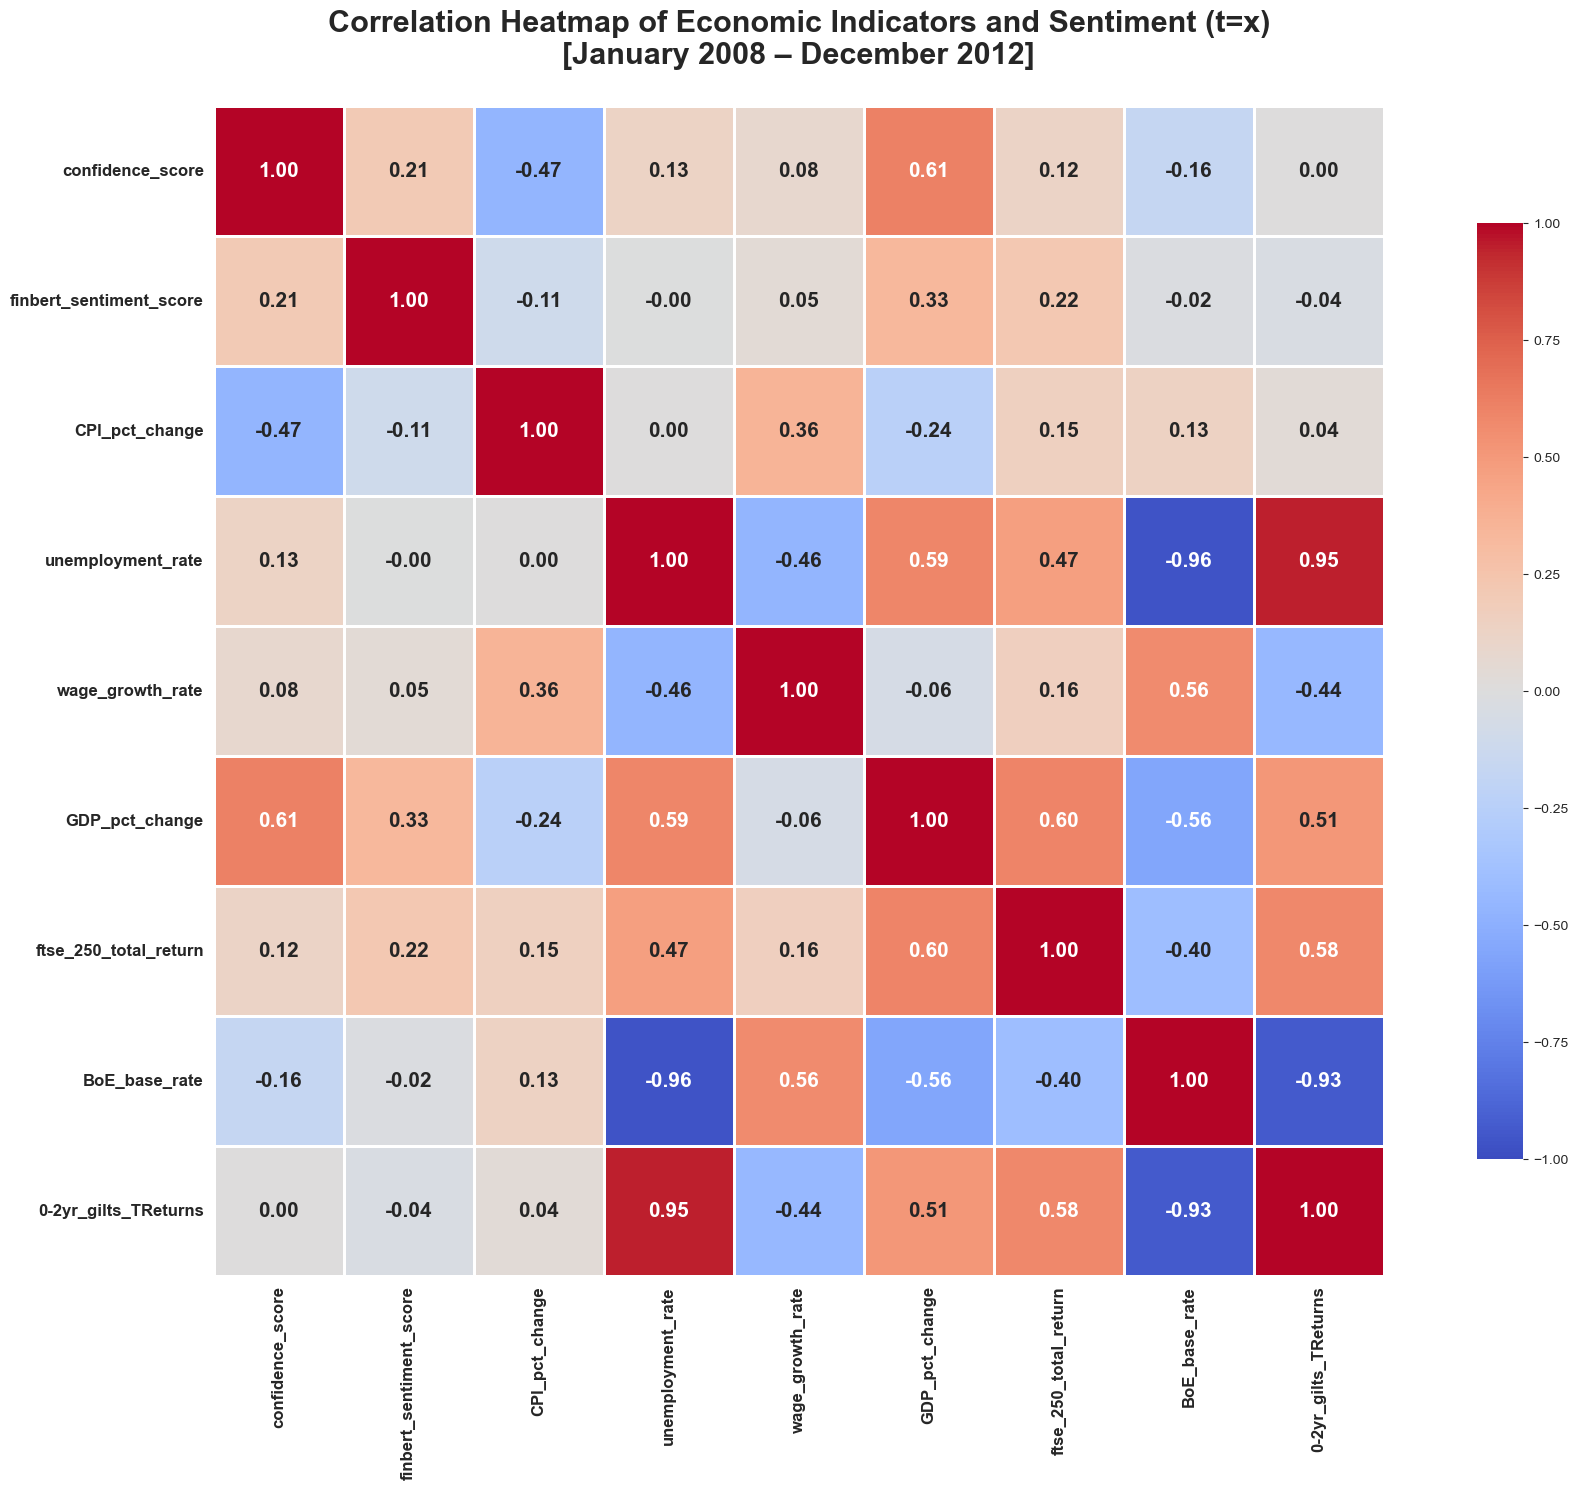

In [17]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]
# --- Correlation on numeric columns only ---
numeric_data = filtered_df.select_dtypes(include='number').dropna()
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap of Economic Indicators and Sentiment (t=x)\n[January 2008 – December 2012]', 
          fontsize=22, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

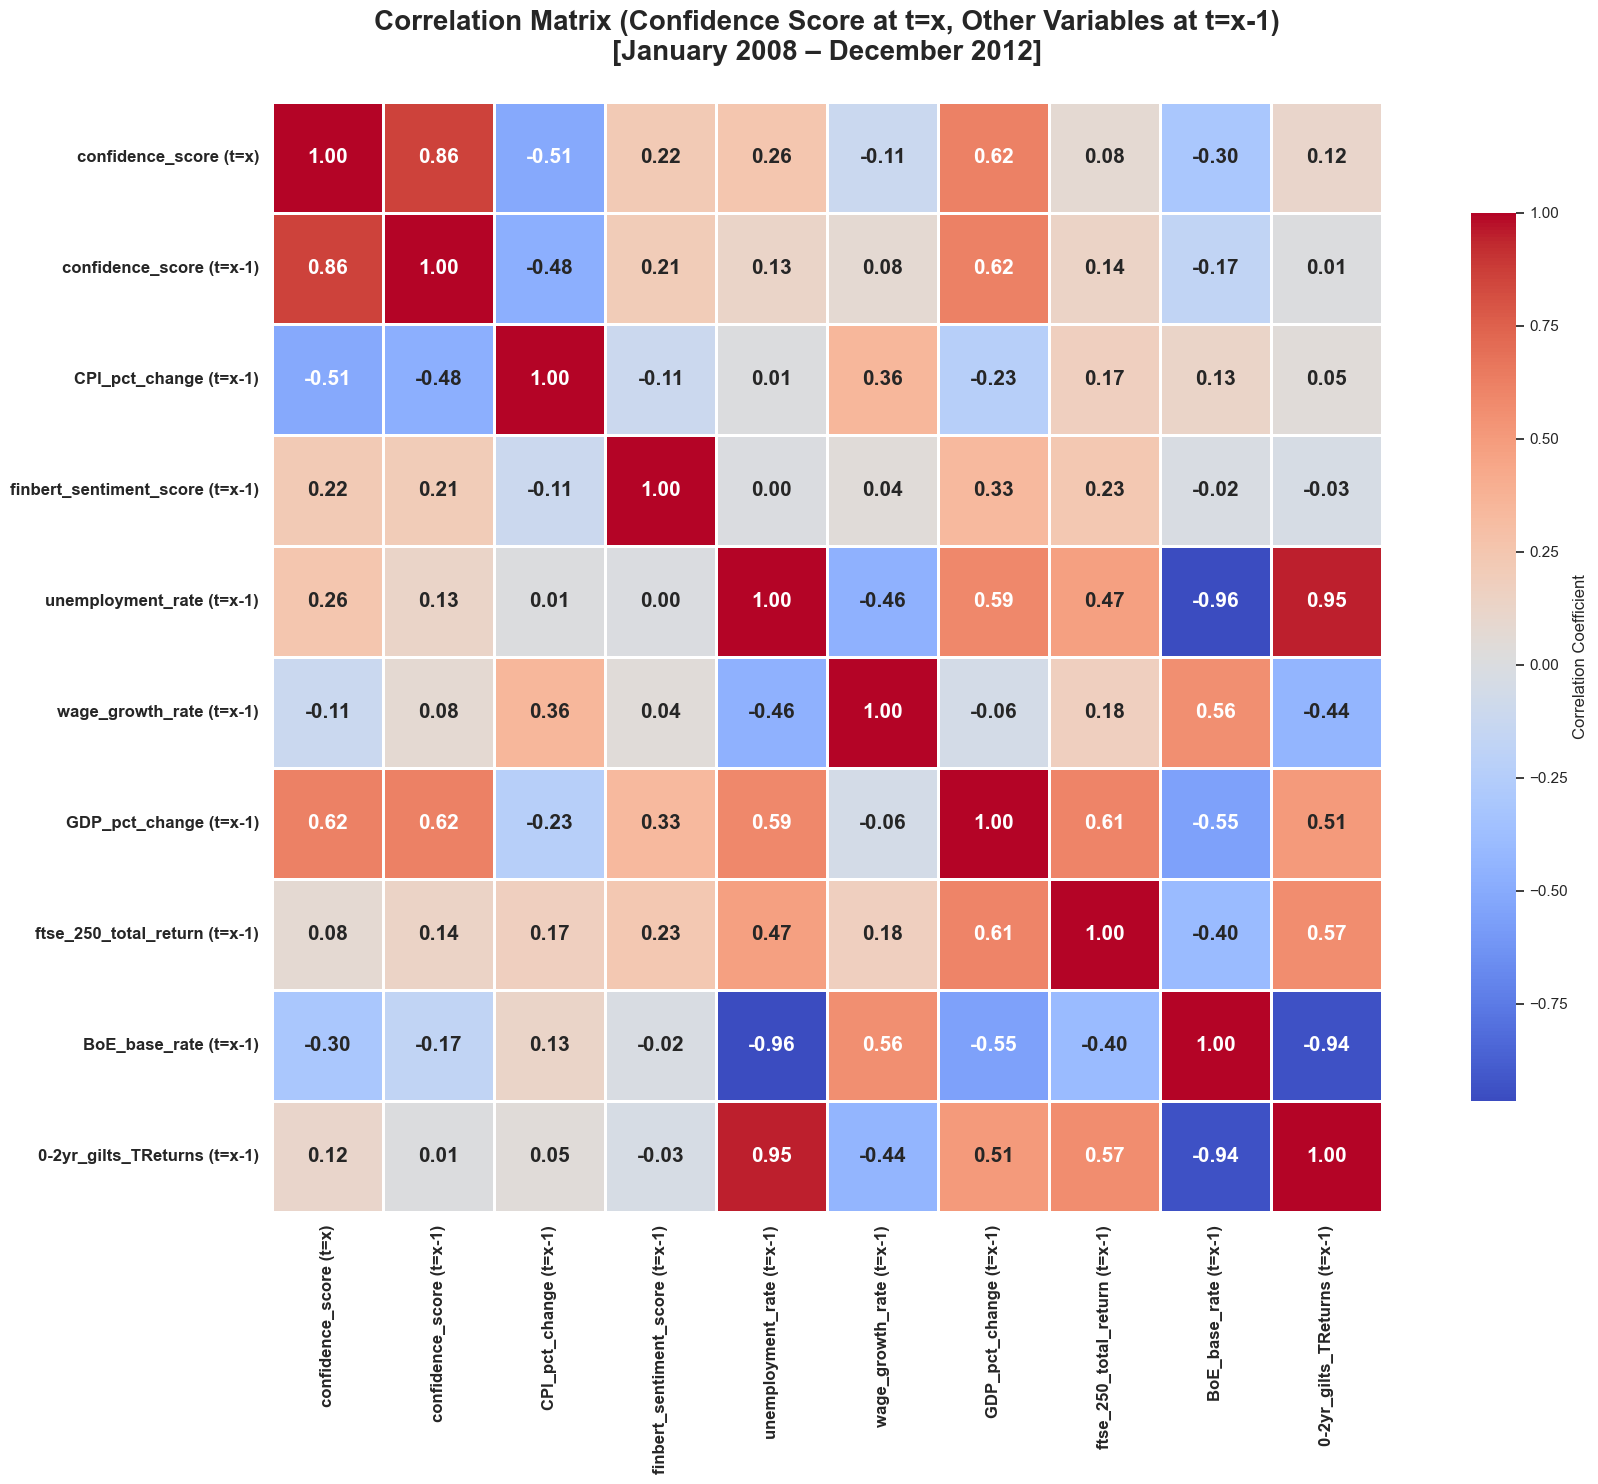

In [18]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()
# Define columns of interest
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-1)\n[January 2008 – December 2012]",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

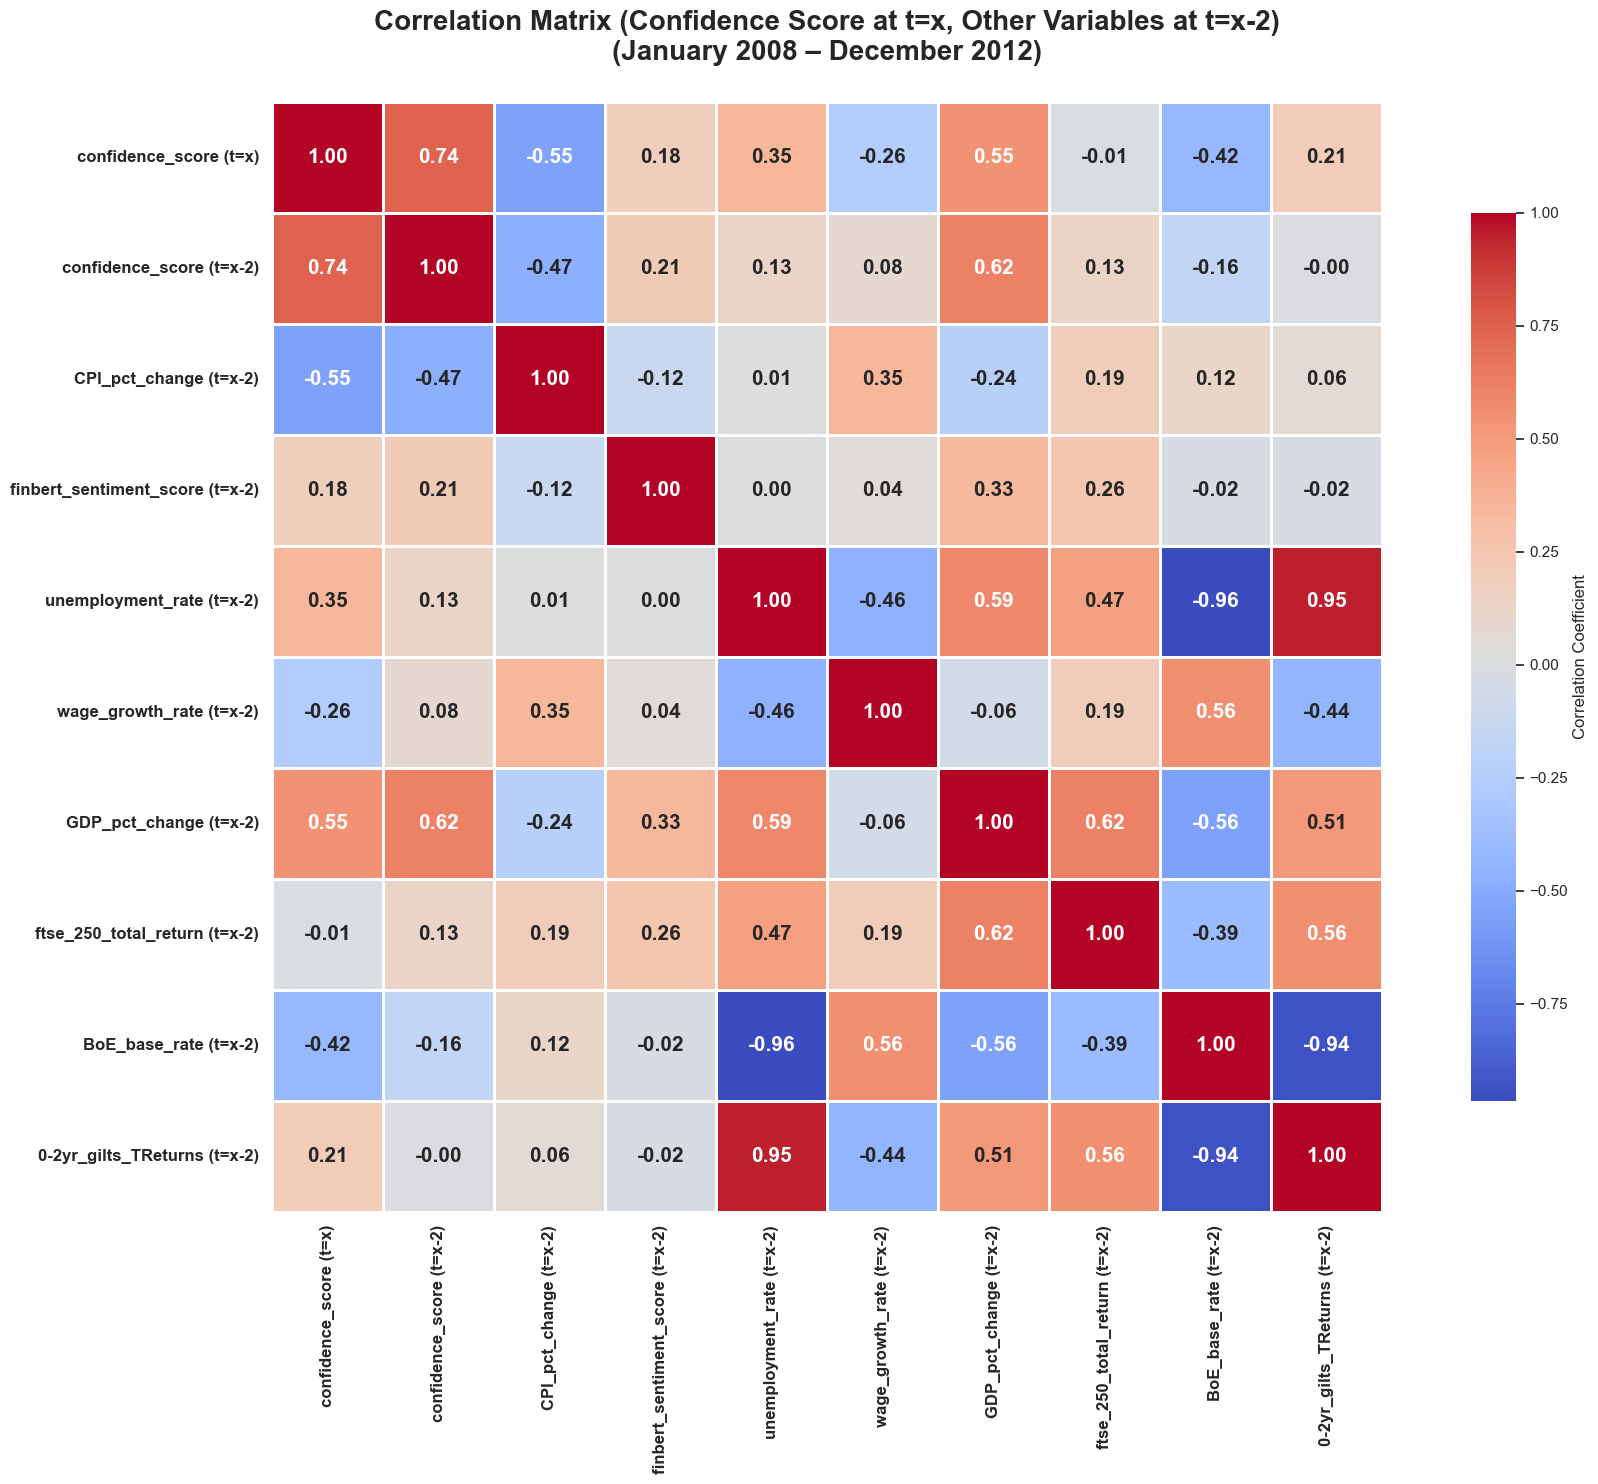

In [19]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest (excluding confidence_score)
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 2-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-2)\n(January 2008 – December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

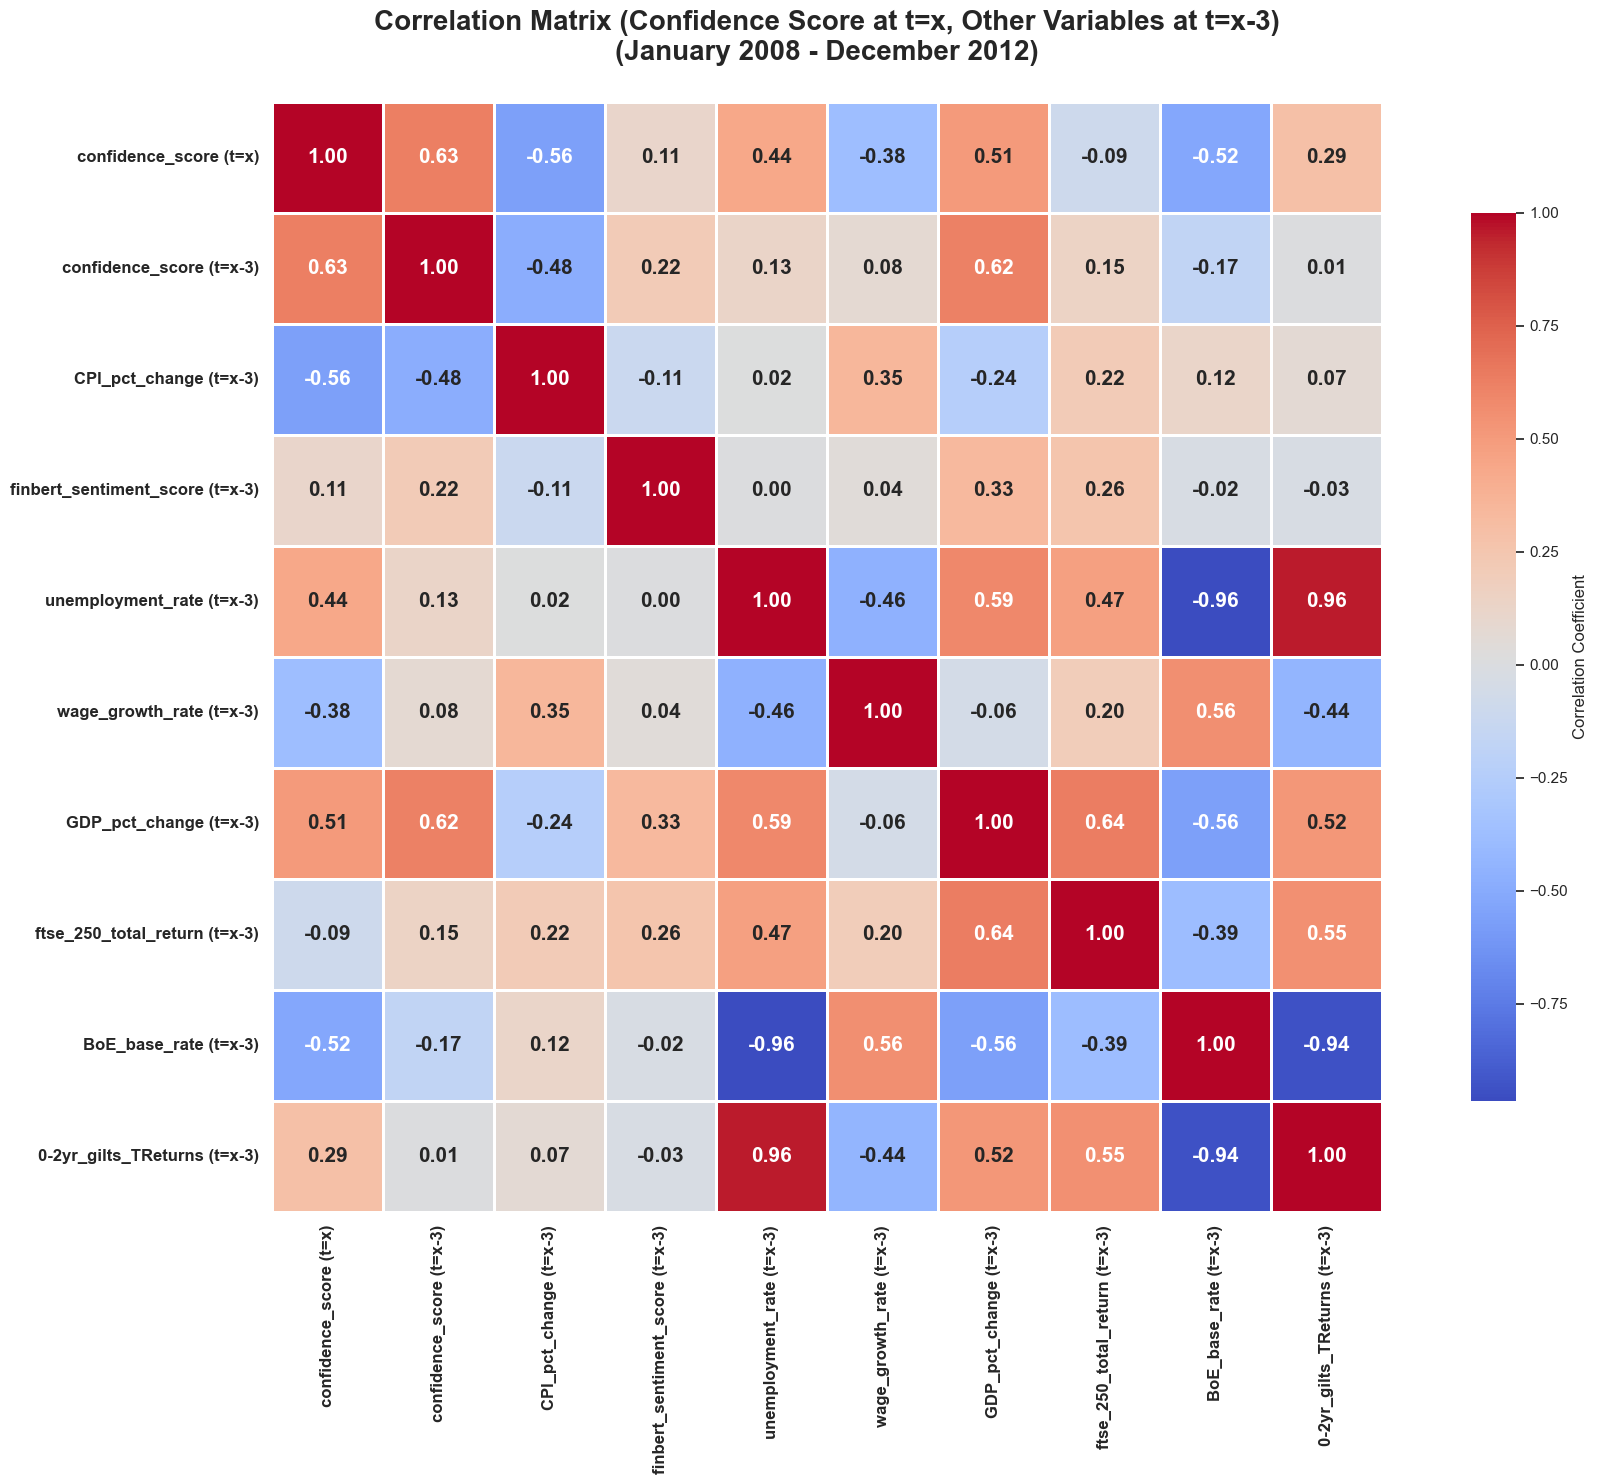

In [20]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()
# Define columns of interest (excluding confidence_score)
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 3-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-3)\n(January 2008 - December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Based on the correlation heatmaps across multiple time lags, the most influential variables on the consumer confidence score are CPI (% change), unemployment rate, GDP (% change), and the BoE base rate. These variables consistently showed the strongest correlations with the confidence score at specific time lags

### Prepare regression dataframe

In [125]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()
# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['confidence_score (t=x)'] = filtered_df['confidence_score']
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(1)
regression_df['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(1)
regression_df['unemployment_rate (t=x-2)'] = filtered_df['unemployment_rate'].shift(2)
regression_df['ftse_250_total_return (t=x-1)'] = filtered_df['ftse_250_total_return'].shift(1)
# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

confidence_score (t=x)  \
confidence_score (t=x)                       1.000000   
confidence_score (t=x-1)                     0.851018   
wage_growth_rate (t=x-1)                    -0.146993   
CPI_pct_change (t=x-1)                      -0.495316   
unemployment_rate (t=x-2)                    0.350162   
ftse_250_total_return (t=x-1)                0.086103   

                               confidence_score (t=x-1)  \
confidence_score (t=x)                         0.851018   
confidence_score (t=x-1)                       1.000000   
wage_growth_rate (t=x-1)                       0.036993   
CPI_pct_change (t=x-1)                        -0.457507   
unemployment_rate (t=x-2)                      0.259061   
ftse_250_total_return (t=x-1)                  0.155646   

                               wage_growth_rate (t=x-1)  \
confidence_score (t=x)                        -0.146993   
confidence_score (t=x-1)                       0.036993   
wage_growth_rate (t=x-1)                       1.000000   
CPI_pct_change (t=x-1)                         0.388711   
unemployment_rate (t=x-2)                     -0.403611   
ftse_250_total_return (t=x-1)                  0.186323   

                               CPI_pct_change (t=x-1)  \
confidence_score (t=x)                      -0.495316   
confidence_score (t=x-1)                    -0.457507   
wage_growth_rate (t=x-1)                     0.388711   
CPI_pct_change (t=x-1)                       1.000000   
unemployment_rate (t=x-2)                   -0.061998   
ftse_250_total_return (t=x-1)                0.168098   

                               unemployment_rate (t=x-2)  \
confidence_score (t=x)                          0.350162   
confidence_score (t=x-1)                        0.259061   
wage_growth_rate (t=x-1)                       -0.403611   
CPI_pct_change (t=x-1)                         -0.061998   
unemployment_rate (t=x-2)                       1.000000   
ftse_250_total_return (t=x-1)                   0.529276   

                               ftse_250_total_return (t=x-1)  
confidence_score (t=x)                              0.086103  
confidence_score (t=x-1)                            0.155646  
wage_growth_rate (t=x-1)                            0.186323  
CPI_pct_change (t=x-1)                              0.168098  
unemployment_rate (t=x-2)                           0.529276  
ftse_250_total_return (t=x-1)                       1.000000

In [127]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','wage_growth_rate (t=x-1)', 'unemployment_rate (t=x-2)',
     'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: -9.403109026342989
Coefficients:
confidence_score (t=x-1)         0.770345
wage_growth_rate (t=x-1)        -0.216077
unemployment_rate (t=x-2)        1.208267
ftse_250_total_return (t=x-1)   -0.000574
CPI_pct_change (t=x-1)          -0.600866
dtype: float64


In [129]:
# Call the predictions for X (array).
mlr.predict(X)

array([-21.70833436, -23.34947739, -27.54526705, -31.70693802,
       -35.22541454, -39.12178484, -36.84297536, -33.29974092,
       -35.32132972, -33.9465979 , -31.65859009, -34.13594953,
       -31.80588984, -27.16687969, -24.8879137 , -24.98322264,
       -23.04207149, -23.0610788 , -23.22297002, -16.20725167,
       -13.91193386, -17.39063626, -19.67130846, -18.87232741,
       -16.62147304, -17.86929998, -18.6414416 , -19.33868623,
       -19.86090312, -22.48105469, -19.38596191, -21.22613987,
       -20.55091936, -22.09679116, -22.6975013 , -29.18675013,
       -28.81164638, -28.61329828, -31.35835063, -23.63009438,
       -26.39902635, -30.18643491, -30.4039629 , -29.58546065,
       -31.06176438, -29.99962461, -31.23260699, -28.0031203 ,
       -28.04579096, -29.76474206, -29.58945044, -27.80017355,
       -27.84798179, -28.02907605, -28.24537035, -27.56864132,
       -29.47195913, -23.30861762])

In [131]:
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.7705084423726746
Intercept:  -9.403109026342989
Coefficients:


[('confidence_score (t=x-1)', 0.7703446328282609),
 ('wage_growth_rate (t=x-1)', -0.21607666508598736),
 ('unemployment_rate (t=x-2)', 1.2082667134300802),
 ('ftse_250_total_return (t=x-1)', -0.0005741533879935337),
 ('CPI_pct_change (t=x-1)', -0.6008655685142338)]

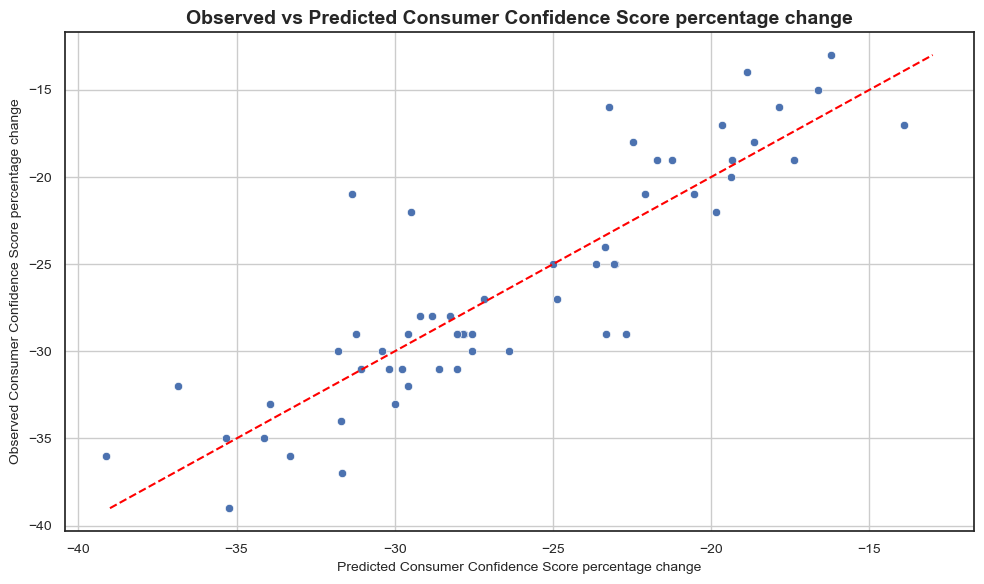

In [133]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()


#### The scatter plot for the 2008–2012 time frame shows a strong positive alignment between the predicted and observed consumer confidence scores. Most data points are clustered closely around the red dashed line (the ideal fit), indicating that the model performed well in capturing the pattern of confidence score changes during this period, despite some moderate deviations at the extremes.

### Training and testing subsets with MLR

In [137]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [139]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.770
Model:                                OLS   Adj. R-squared:                  0.741
Method:                     Least Squares   F-statistic:                     26.79
Date:                    Mon, 19 May 2025   Prob (F-statistic):           8.69e-12
Time:                            02:42:25   Log-Likelihood:                -118.30
No. Observations:                      46   AIC:                             248.6
Df Residuals:                          40   BIC:                             259.6
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#### This OLS regression model for the 2008–2012 period explains 77% of the variation in the consumer confidence score (R² = 0.77). The confidence score at lag one month (t=x-1) is the only statistically significant predictor (p < 0.001), showing a strong positive effect. Other variables—including wage growth, unemployment rate, FTSE250 total returns, and CPI change—have no statistically significant impact (p > 0.05). While the overall model is statistically significant (p < 0.001), the individual predictors beyond confidence_score (t=x-1) may not meaningfully contribute during this timeframe.

In [143]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [145]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [-28.4188504  -20.95265712 -36.17540404 -23.27362475 -37.23772703
 -35.69077726 -29.77364513 -16.16064338 -19.22265959 -29.26809036
 -29.11262119 -27.76435879 -25.31775872 -34.79421415 -19.20765505
 -18.40210128 -23.37117968 -16.57264087 -21.80758158 -27.02514588
 -25.8914221  -34.90316978 -20.2072483  -28.90291802 -29.43070108
 -22.32746235 -27.59116315 -23.5990268  -17.38995195 -27.80249589
 -29.72936855 -23.08840109 -28.81716462 -18.85208904 -27.63492826
 -32.41709397 -19.62221214 -23.29401507 -22.65810812 -13.87526429
 -33.88241819 -30.15033241 -25.23205212 -19.77502677 -27.46648913
 -30.91014055]


In [147]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [-21.93259089 -39.6524279  -22.24387898 -27.73878521 -30.78523084
 -27.45125128 -28.22141755 -17.67825707 -31.01719664 -32.5301005
 -27.54666229 -32.02025485]


In [149]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

69.90797411781698


### Check for multicollinearity

In [152]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))


   VIF Factor                       features
0       208.3                          const
1         1.6       confidence_score (t=x-1)
2         2.4       wage_growth_rate (t=x-1)
3         2.8      unemployment_rate (t=x-2)
4         1.8  ftse_250_total_return (t=x-1)
5         1.9         CPI_pct_change (t=x-1)


#### The VIF results indicate no multicollinearity issues

### Check for heteroscedasticity

In [156]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [158]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 3.6217921026094255, 'LM Test p-value': 0.6050443036495916, 'F-stat': 0.6837084024654915, 'F-test p-value': 0.6384593916481689}


#### The LM test results show high p-values (both above 0.60), indicating no significant evidence of autocorrelation in the model’s residuals. This suggests the regression assumptions regarding error independence are likely satisfied.










### Check normality of regression residuals - assumption of MLR

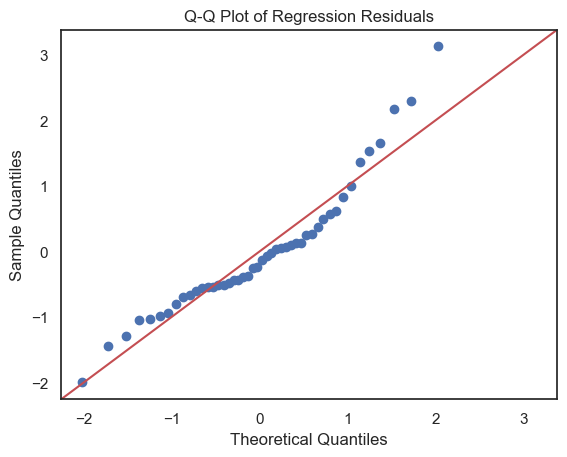

In [162]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot shows that most residuals lie along the diagonal line, suggesting that the residuals are approximately normally distributed. However, slight deviations at the tails indicate mild non-normality, which is common in small samples.

### Evaluate the model

In [166]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 2.5233885353922596
Mean Square Error (Final): 8.95237769995992


#### The model's performance is solid, with a Mean Absolute Error (MAE) of 2.52 and a Mean Squared Error (MSE) of 8.59, indicating relatively low average prediction error and good overall accuracy.

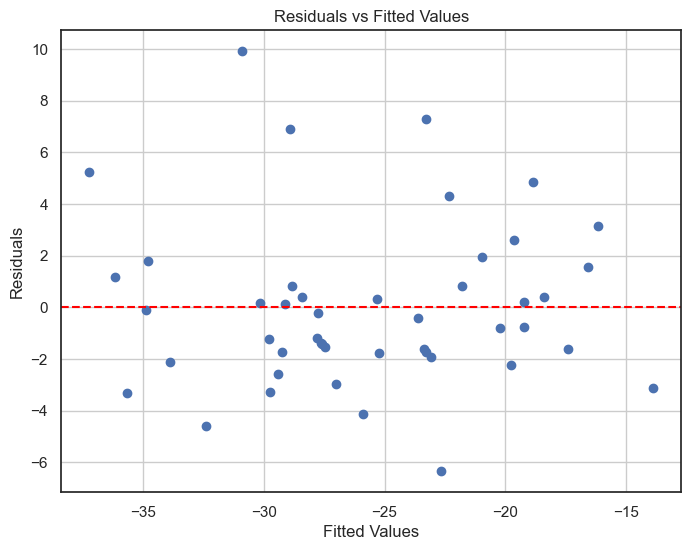

In [169]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

#### The residuals vs. fitted values plot shows a fairly random scatter around the horizontal line at zero, which suggests that the model's errors are generally unbiased and the linear regression assumptions are reasonably met. However, a slight pattern at the edges may hint at some non-linearity or heteroscedasticity.

#### Drop CPI, FTSE250, and Unemployment and Re perform MLR 

In [192]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','unemployment_rate (t=x-2)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [194]:
# Call the predictions for X (array).
mlr.predict(X)

array([-21.13285019, -22.73755401, -26.65465603, -30.76107315,
       -34.58351761, -38.50061963, -35.90424879, -32.50552604,
       -35.62027614, -34.62860913, -32.8345902 , -35.9493403 ,
       -34.15532137, -29.7649316 , -27.16856076, -26.88458811,
       -25.09056918, -24.99591163, -24.99591163, -17.86940196,
       -15.36768867, -18.67175388, -20.2764577 , -18.76641143,
       -16.17004059, -16.87773495, -17.68008686, -19.37944824,
       -20.18180015, -22.68351344, -19.47410579, -21.07880962,
       -20.18180015, -21.78650398, -21.78650398, -28.20531929,
       -27.49762492, -27.49762492, -29.99933822, -21.88116153,
       -24.99591163, -28.91301365, -29.52605046, -28.629041  ,
       -30.13908728, -29.24207781, -30.94143919, -27.82668909,
       -27.82668909, -29.52605046, -29.52605046, -28.01600419,
       -28.11066174, -28.11066174, -28.20531929, -27.49762492,
       -29.10232875, -22.68351344])

In [196]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_)

R-squared:  0.7422633185028495
Intercept:  -12.415060275659656
Coefficients:


[('confidence_score (t=x-1)', 0.8023519135116516),
 ('unemployment_rate (t=x-2)', 0.9465755037257634)]

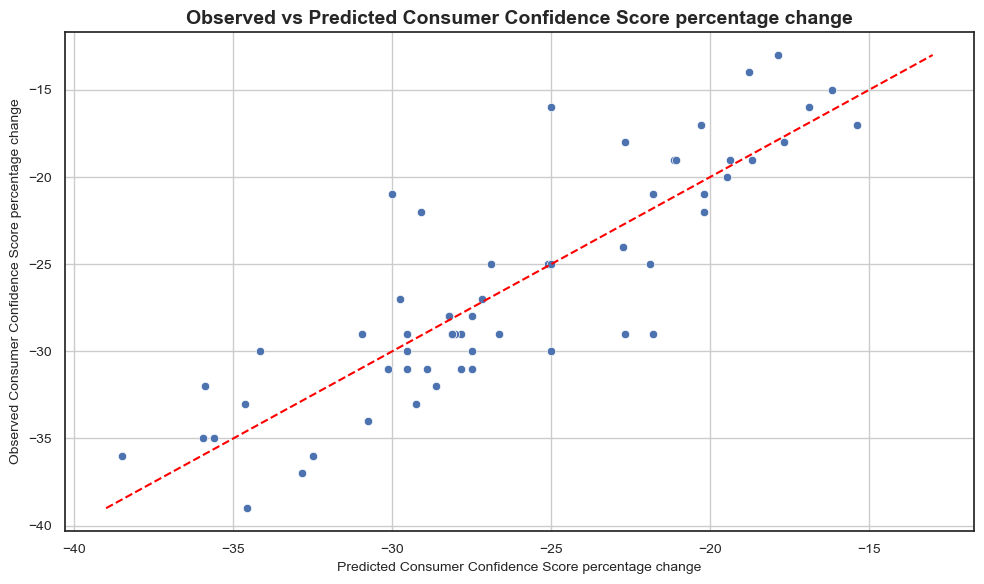

In [198]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [201]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [203]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  
                           

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.753
Model:                                OLS   Adj. R-squared:                  0.742
Method:                     Least Squares   F-statistic:                     65.61
Date:                    Mon, 19 May 2025   Prob (F-statistic):           8.63e-14
Time:                            02:46:27   Log-Likelihood:                -119.93
No. Observations:                      46   AIC:                             245.9
Df Residuals:                          43   BIC:                             251.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

#### The updated multiple linear regression (MLR) model, after removing high VIF variables to reduce multicollinearity, shows a good fit with an R-squared of 0.753. The confidence score at t=x-1 are unemployment rate (t=x-2) are a significant predictor (p < 0.001)

In [206]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                   features
0       127.8                      const
1         1.1   confidence_score (t=x-1)
2         1.1  unemployment_rate (t=x-2)


#### No multicollinearity observed from the VIF output

In [209]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [211]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 0.7971486141460091, 'LM Test p-value': 0.671276398154331, 'F-stat': 0.3791507544035753, 'F-test p-value': 0.6867078036178902}


#### The Breusch-Pagan test results indicate no evidence of heteroskedasticity, as both the LM Test p-value (0.671) and F-test p-value (0.686) are well above 0.05. This suggests that the variance of the residuals is constant and the model satisfies the homoskedasticity assumption.

In [215]:
regression_df.describe()

Date  confidence_score (t=x)  \
count                             58               58.000000   
mean   2010-07-17 01:14:28.965517312              -26.327586   
min              2008-03-01 00:00:00              -39.000000   
25%              2009-05-08 18:00:00              -31.000000   
50%              2010-07-16 12:00:00              -28.500000   
75%              2011-09-23 12:00:00              -21.000000   
max              2012-12-01 00:00:00              -13.000000   
std                              NaN                6.535699   

       confidence_score (t=x-1)  wage_growth_rate (t=x-1)  \
count                 58.000000                 58.000000   
mean                 -26.120690                  1.912069   
min                  -39.000000                 -2.900000   
25%                  -31.000000                  1.125000   
50%                  -28.000000                  1.800000   
75%                  -20.250000                  2.800000   
max                  -13.000000                  4.900000   
std                    6.638742                  1.513342   

       CPI_pct_change (t=x-1)  unemployment_rate (t=x-2)  \
count               58.000000                  58.000000   
mean                 3.312069                   7.443103   
min                  1.100000                   5.200000   
25%                  2.700000                   7.375000   
50%                  3.200000                   7.800000   
75%                  4.075000                   7.975000   
max                  5.200000                   8.500000   
std                  0.969912                   0.959918   

       ftse_250_total_return (t=x-1)  
count                      58.000000  
mean                     5908.763448  
min                      3487.350000  
25%                      5246.582500  
50%                      6016.080000  
75%                      7005.195000  
max                      7726.080000  
std                      1198.694371

In [217]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 220 to 277
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           58 non-null     datetime64[ns]
 1   confidence_score (t=x)         58 non-null     float64       
 2   confidence_score (t=x-1)       58 non-null     float64       
 3   wage_growth_rate (t=x-1)       58 non-null     float64       
 4   CPI_pct_change (t=x-1)         58 non-null     float64       
 5   unemployment_rate (t=x-2)      58 non-null     float64       
 6   ftse_250_total_return (t=x-1)  58 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.6 KB


In [219]:
regression_df.head()

Date  confidence_score (t=x)  confidence_score (t=x-1)  \
220 2008-03-01                   -19.0                     -17.0   
221 2008-04-01                   -24.0                     -19.0   
222 2008-05-01                   -29.0                     -24.0   
223 2008-06-01                   -34.0                     -29.0   
224 2008-07-01                   -39.0                     -34.0   

     wage_growth_rate (t=x-1)  CPI_pct_change (t=x-1)  \
220                       3.6                     2.5   
221                       4.1                     2.5   
222                       4.6                     3.0   
223                       4.7                     3.3   
224                       4.2                     3.8   

     unemployment_rate (t=x-2)  ftse_250_total_return (t=x-1)  
220                        5.2                        5594.87  
221                        5.2                        5581.66  
222                        5.3                        5679.93  
223                        5.2                        5657.73  
224                        5.4                        5163.11

Root Mean Squared Error: 3.1662
Mean Squared Error: 10.0250
Mean Absolute Error: 2.5797
R² Score: 0.7098


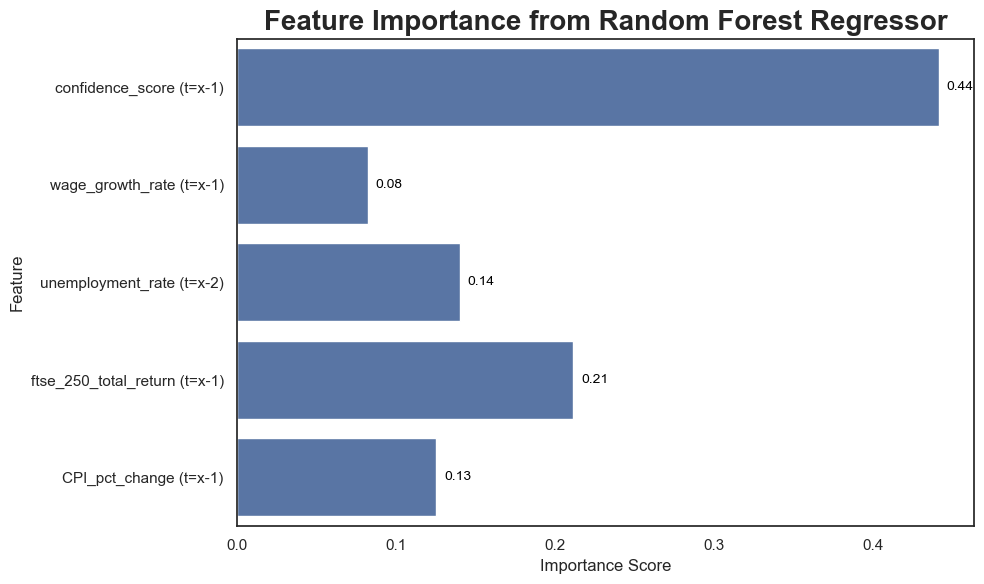

In [221]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['confidence_score (t=x)',
     'confidence_score (t=x-1)','wage_growth_rate (t=x-1)', 'unemployment_rate (t=x-2)',
     'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)'
])
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
'confidence_score (t=x-1)','wage_growth_rate (t=x-1)', 'unemployment_rate (t=x-2)',
     'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)'
    ]
]

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Root Mean Squared Error: 3.0018
Mean Squared Error: 9.0108
Mean Absolute Error: 2.4532
R² Score: 0.7391


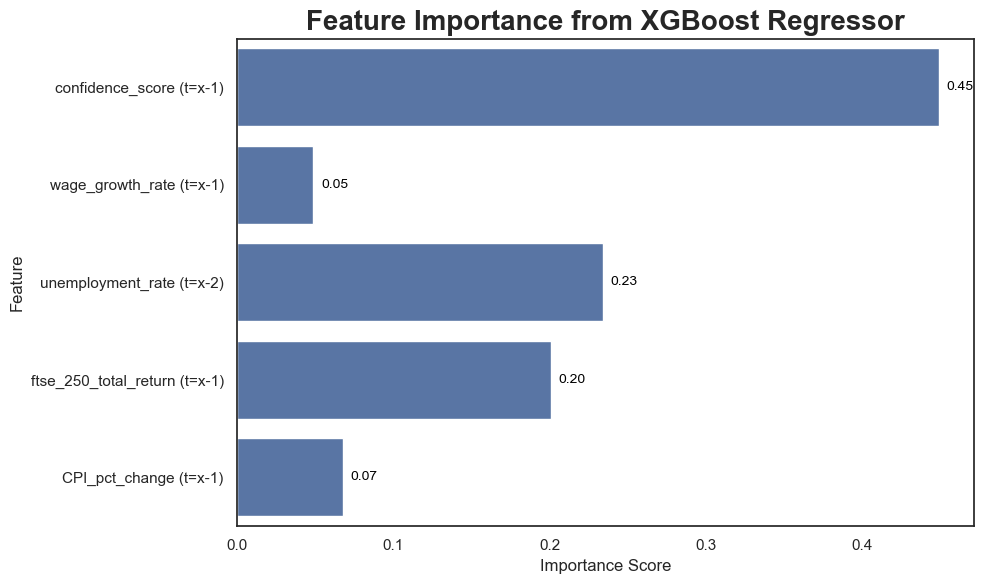

In [227]:
from xgboost import XGBRegressor

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['confidence_score (t=x)',
     'confidence_score (t=x-1)','wage_growth_rate (t=x-1)', 'unemployment_rate (t=x-2)',
     'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)'
])
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
'confidence_score (t=x-1)','wage_growth_rate (t=x-1)', 'unemployment_rate (t=x-2)',
     'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)'
    ]
]
# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

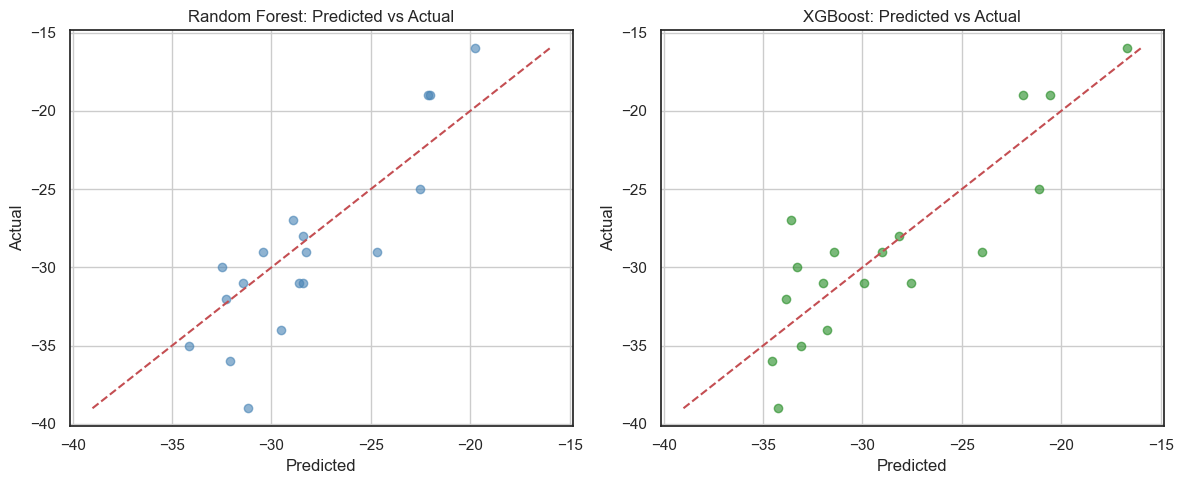

In [229]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()


#### The comparison between the Random Forest and XGBoost models highlights that both are effective in predicting changes in consumer confidence scores, though Random Forest demonstrates slightly weaker overall performance. It achieved a higher R² score (0.7098 vs. 0.7391), along with lower mean absolute error (2.58 vs. 2.45) and mean squared error (10.02 vs. 9.01), suggesting more accurate predictions. In terms of feature importance, both models identified the lagged confidence score (t=x-1) as the most influential predictor, though XGBoost gave it even more weight (0.45 vs. 0.44). Interestingly, unemployment rate (t=x-2) was more prominent in XGBoost, while Random Forest assigned greater importance to the FTSE250 returns (t=x-1). Overall, Random Forest provided more balanced feature contributions, whereas XGBoost concentrated more heavily on past confidence scores, unemployment rate and FTSE250 returns.

## Additional changes post initial pitch to BOE

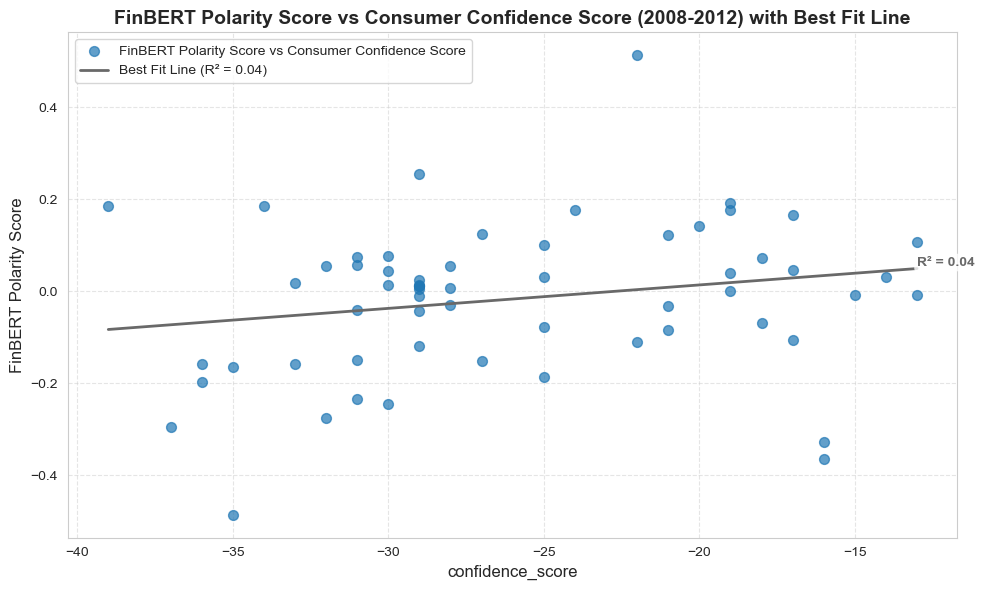

In [27]:
from scipy import stats # Correct import for stats.linregress
import numpy as np

# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')

df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['CPI', 'polarity_score_finbert'])

# Check if df_plot has enough data after filtering and dropping NaNs
if df_plot.empty or len(df_plot) < 2:
    print("Not enough valid data points to create a scatter plot and best-fit line.")
else:
    # Apply a Seaborn style
    sns.set_style('whitegrid')

    # Plotting setup for a single scatter plot
    fig, ax = plt.subplots(figsize=(10, 6)) # Using a single axis for scatter plot

    # Scatter Plot: 'polarity_score_finbert' on Y-axis, 'CPI' on X-axis
    color_scatter = '#2077b4' # Using a standard blue for scatter points
    ax.scatter(
        df_plot['confidence_score'],                 # X-axis
        df_plot['polarity_score_finbert'], # Y-axis
        color=color_scatter,
        alpha=0.7,                     # Transparency for overlapping points
        s=50,                          # Size of markers
        label='FinBERT Polarity Score vs Consumer Confidence Score'
    )

    # --- Add Best Fit Line ---
    # Perform linear regression
    x_for_regression = df_plot['confidence_score'].values
    y_for_regression = df_plot['polarity_score_finbert'].values

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_for_regression, y_for_regression)
    r_squared = r_value**2

    # Create the best-fit line values
    x_line = np.array([x_for_regression.min(), x_for_regression.max()])
    y_line = slope * x_line + intercept

    # Change line color to dark grey
    ax.plot(x_line, y_line, color='dimgray', linestyle='-', linewidth=2, label=f'Best Fit Line (R² = {r_squared:.2f})')

    # --- Display R-squared at the tip of the best fit line ---
    text_x_pos = x_line.max()
    text_y_pos = y_line[np.argmax(x_line)]

    # Change text color to dark grey
    ax.text(text_x_pos, text_y_pos,
            f'R² = {r_squared:.2f}',
            color='dimgray', # Changed color to dark grey
            fontsize=10,
            fontweight='bold',
            ha='left',
            va='bottom',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))


    # Set labels and title
    ax.set_xlabel('confidence_score', fontsize=12)
    ax.set_ylabel('FinBERT Polarity Score', fontsize=12)
    plt.title('FinBERT Polarity Score vs Consumer Confidence Score (2008-2012) with Best Fit Line', fontsize=14, fontweight='bold')

    # Add grid
    ax.grid(True, which='major', linestyle='--', alpha=0.5)

    # Add legend
    ax.legend(loc='best', fontsize=10)

    # Adjust layout
    fig.tight_layout()

    plt.show()

### Prepare new regression dataframe for additional Random Forest and XGBoost models

In [56]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Step 2: Create new DataFrame for regression
regression_df_sentiment = pd.DataFrame()
regression_df_sentiment['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df_sentiment['confidence_score (t=x)'] = filtered_df['confidence_score']
regression_df_sentiment['finbert_sentiment_score (t=x-1)'] = filtered_df['finbert_sentiment_score'].shift(1)
regression_df_sentiment['unemployment_rate (t=x-2)'] = filtered_df['unemployment_rate'].shift(2)
regression_df_sentiment['ftse_250_total_return (t=x-1)'] = filtered_df['ftse_250_total_return'].shift(1)
regression_df_sentiment['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(1)
regression_df_sentiment['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(1)
# Step 3: Drop rows with missing values due to shifting
regression_df_sentiment.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df_sentiment.drop(columns='Date').corr()
display(correlation_matrix)


confidence_score (t=x)  \
confidence_score (t=x)                         1.000000   
finbert_sentiment_score (t=x-1)                0.225107   
unemployment_rate (t=x-2)                      0.350162   
ftse_250_total_return (t=x-1)                  0.086103   
wage_growth_rate (t=x-1)                      -0.146993   
CPI_pct_change (t=x-1)                        -0.495316   

                                 finbert_sentiment_score (t=x-1)  \
confidence_score (t=x)                                  0.225107   
finbert_sentiment_score (t=x-1)                         1.000000   
unemployment_rate (t=x-2)                               0.032343   
ftse_250_total_return (t=x-1)                           0.234435   
wage_growth_rate (t=x-1)                                0.044260   
CPI_pct_change (t=x-1)                                 -0.108670   

                                 unemployment_rate (t=x-2)  \
confidence_score (t=x)                            0.350162   
finbert_sentiment_score (t=x-1)                   0.032343   
unemployment_rate (t=x-2)                         1.000000   
ftse_250_total_return (t=x-1)                     0.529276   
wage_growth_rate (t=x-1)                         -0.403611   
CPI_pct_change (t=x-1)                           -0.061998   

                                 ftse_250_total_return (t=x-1)  \
confidence_score (t=x)                                0.086103   
finbert_sentiment_score (t=x-1)                       0.234435   
unemployment_rate (t=x-2)                             0.529276   
ftse_250_total_return (t=x-1)                         1.000000   
wage_growth_rate (t=x-1)                              0.186323   
CPI_pct_change (t=x-1)                                0.168098   

                                 wage_growth_rate (t=x-1)  \
confidence_score (t=x)                          -0.146993   
finbert_sentiment_score (t=x-1)                  0.044260   
unemployment_rate (t=x-2)                       -0.403611   
ftse_250_total_return (t=x-1)                    0.186323   
wage_growth_rate (t=x-1)                         1.000000   
CPI_pct_change (t=x-1)                           0.388711   

                                 CPI_pct_change (t=x-1)  
confidence_score (t=x)                        -0.495316  
finbert_sentiment_score (t=x-1)               -0.108670  
unemployment_rate (t=x-2)                     -0.061998  
ftse_250_total_return (t=x-1)                  0.168098  
wage_growth_rate (t=x-1)                       0.388711  
CPI_pct_change (t=x-1)                         1.000000

### Re-run Random Forest (substitute lagged dependent variable with finbert_sentiment_score with highest time lag (t=x-1))

Root Mean Squared Error: 5.2533
Mean Squared Error: 27.5968
Mean Absolute Error: 3.9992
R² Score: 0.2011


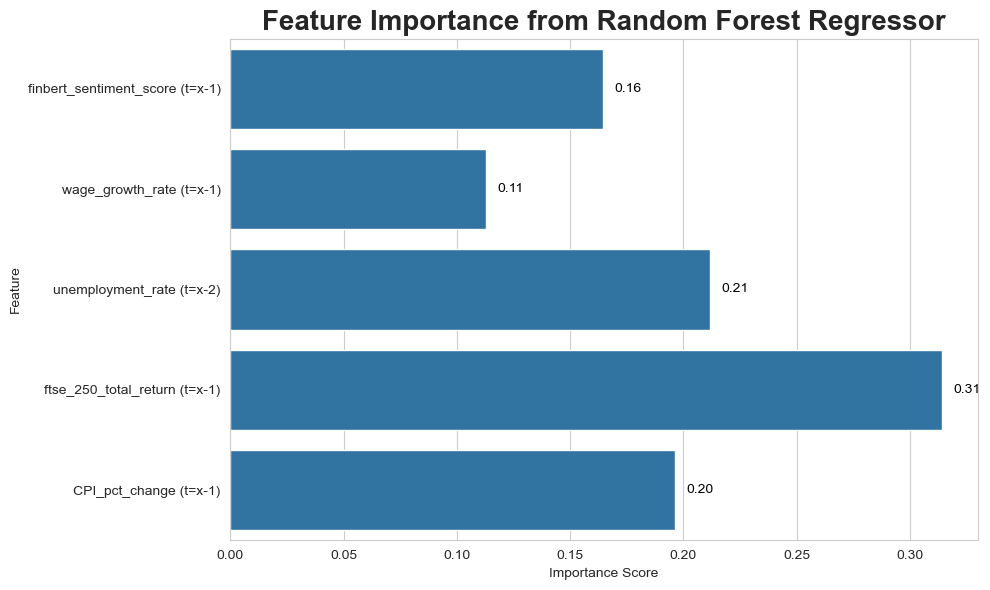

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas


# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df_sentiment = regression_df_sentiment.dropna(
    subset=[
        'confidence_score (t=x)',
        'finbert_sentiment_score (t=x-1)', 'wage_growth_rate (t=x-1)', 
       'unemployment_rate (t=x-2)','ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)'
    ]
)

# Define features and target
X = regression_df_sentiment[
    [
       'finbert_sentiment_score (t=x-1)', 'wage_growth_rate (t=x-1)', 
       'unemployment_rate (t=x-2)','ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)'
    ]
]
y = regression_df_sentiment['confidence_score (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

### Re-run XGBoost (substitute lagged dependent variable with finbert_sentiment_score (t=x-1))

Root Mean Squared Error: 4.6468
Mean Squared Error: 21.5929
Mean Absolute Error: 3.6271
R² Score: 0.3749


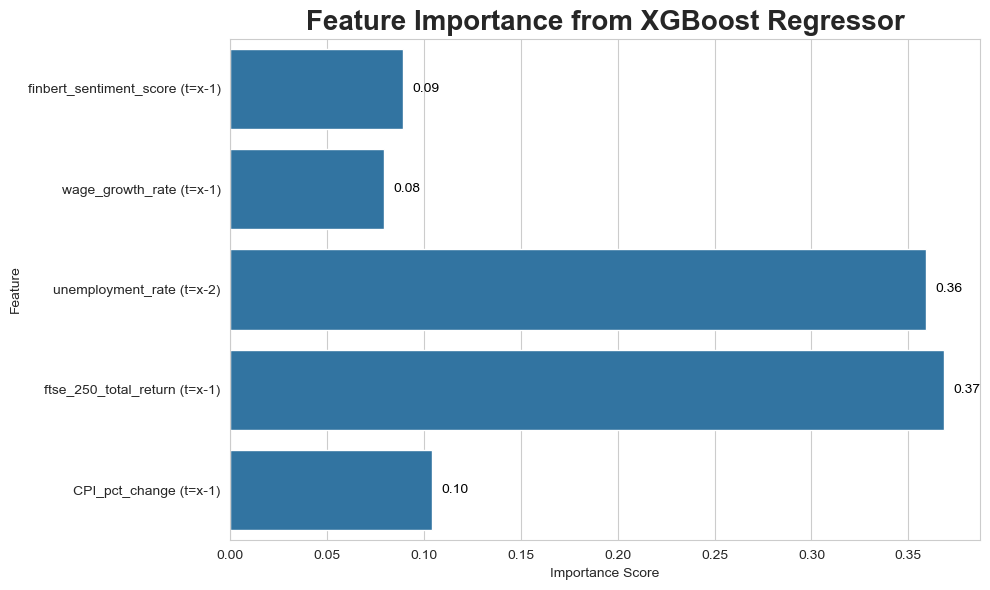

In [64]:
from xgboost import XGBRegressor
# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df_sentiment = regression_df_sentiment.dropna(
    subset=[
        'confidence_score (t=x)',
        'finbert_sentiment_score (t=x-1)', 'wage_growth_rate (t=x-1)', 
       'unemployment_rate (t=x-2)','ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)'
    ]
)

# Define features and target
X = regression_df_sentiment[
    [
       'finbert_sentiment_score (t=x-1)', 'wage_growth_rate (t=x-1)', 
       'unemployment_rate (t=x-2)','ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)'
    ]
]
y = regression_df_sentiment['confidence_score (t=x)']


# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()